# ANÁLISIS TOL

Cargo paquetes

In [41]:
import os
import numpy as np
import pandas as pd
import mne
#from mne.preprocessing import ICA, corrmap, create_ecg_epochs, create_eog_epochs


Cargo datos de prueba

In [42]:
epochs = mne.read_epochs("..\data\TOL\epochs\SAAV0010_TOL_epochs_05_3.fif")



Reading e:\Procesamiento EEG\scripts\..\data\TOL\epochs\SAAV0010_TOL_epochs_05_3.fif ...
    Found the data of interest:
        t =    -500.00 ...    3000.00 ms
        0 CTF compensation matrices available


C:\Users\slipina\AppData\Local\Temp\ipykernel_5260\3889129347.py:1: RuntimeWarning: This filename (..\data\TOL\epochs\SAAV0010_TOL_epochs_05_3.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs("..\data\TOL\epochs\SAAV0010_TOL_epochs_05_3.fif")


Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated


Acá lo que hago es convertir el epochs en df para poder modificar la condición. Sin embargo, no puedo volver a convertirlo en epochs. Deberia encontrar una forma de trabjar directamente sobre el objeto epochs sin convertirlo

In [55]:
tower_evk = epochs["Start/Tower"].average
plane_evk = epochs["Start/Plane"].average

evoked_combine = mne.combine_evoked([tower_evk, plane_evk], weights= 'nave')
#assert evoked_combine.nave == tower_evk.nave + plane_evk.nave

NameError: name 'combine_evoked' is not defined

In [48]:
mne.viz.plot_compare_evokeds(
    evoked_combine,
    #picks="MEG 1811",
    #colors=dict(aud=0, vis=1),
    linestyles=dict(left="solid", right="dashed"),
    time_unit="ms",
)

NameError: name 'evoked_combine' is not defined

In [32]:
epochs.plot()

In [33]:
df = epochs.to_data_frame()


Genero un diccionario que me empareja número de ensayo con tipo de ensayo

Ahora, le agrego la información del tipo de ensayo al objeto epochs. 
Como, por algún motivo, el primer ensayo no quedó grabado, le paso todos los tipos de ensayo menos los del primer ensayo

In [34]:
goal_hierarchy = ["tower", "tower", "tower", "tower", "tower",
"plane", "tower", "tower", "tower", "tower",
"tower", "tower", "tower", "tower", "tower",
"plane", "tower", "tower", "plane", "tower",
"tower", "plane", "tower", "tower", "tower",
"tower", "tower", "plane", "plane", "plane",
"tower", "plane", "plane", "tower", "plane",
"tower", "tower", "tower", "tower", "tower",
"tower", "plane", "tower", "tower", "tower",
"plane", "tower", "tower"]


df = pd.DataFrame (
    goal_hierarchy[1:],   
    columns= ["goal_hierarchy"])



In [35]:
epochs.metadata = df
epochs.metadata.head()

ValueError: metadata must have the same number of rows (47) as events (45)

In [ ]:
print(epochs['goal_hierarchy.str.startswith("tower")'])
print(epochs['goal_hierarchy.str.startswith("plane")'])

print(epochs['goal_hierarchy =="tower"'])
print(epochs['goal_hierarchy =="plane"'])

<EpochsFIF |  35 events (all good), -0.5 – 3 s, baseline -0.5 – 0 s, ~62.3 MB, data loaded, with metadata,
 '1': 35>
<EpochsFIF |  12 events (all good), -0.5 – 3 s, baseline -0.5 – 0 s, ~21.4 MB, data loaded, with metadata,
 '1': 12>
<EpochsFIF |  35 events (all good), -0.5 – 3 s, baseline -0.5 – 0 s, ~62.3 MB, data loaded, with metadata,
 '1': 35>
<EpochsFIF |  12 events (all good), -0.5 – 3 s, baseline -0.5 – 0 s, ~21.4 MB, data loaded, with metadata,
 '1': 12>


    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


c:\Users\slipina\AppData\Local\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


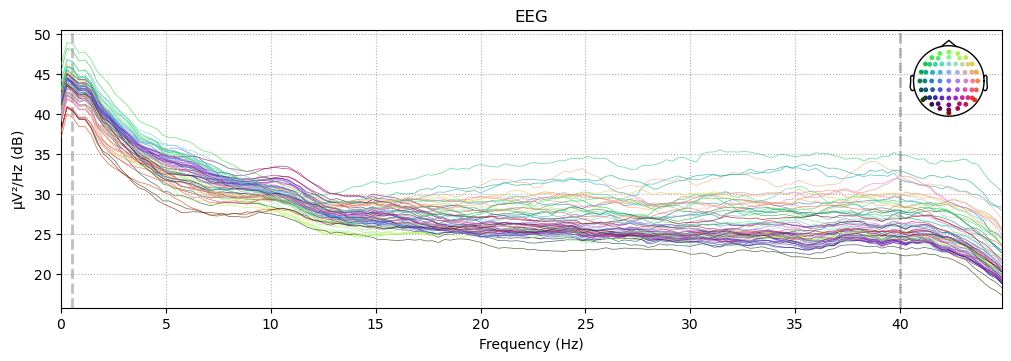

In [ ]:
epochs['goal_hierarchy == "tower"'].compute_psd(fmax = 45).plot(picks="data", exclude="bads", amplitude=False)

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


c:\Users\slipina\AppData\Local\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


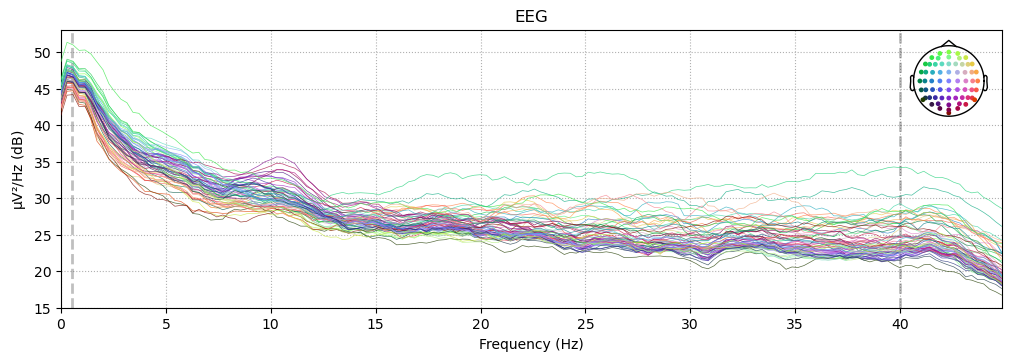

In [ ]:
epochs['goal_hierarchy == "plane"'].compute_psd(fmax = 45).plot(picks="data", exclude="bads", amplitude=False)

Not setting metadata
47 matching events found
No baseline correction applied
0 projection items activated


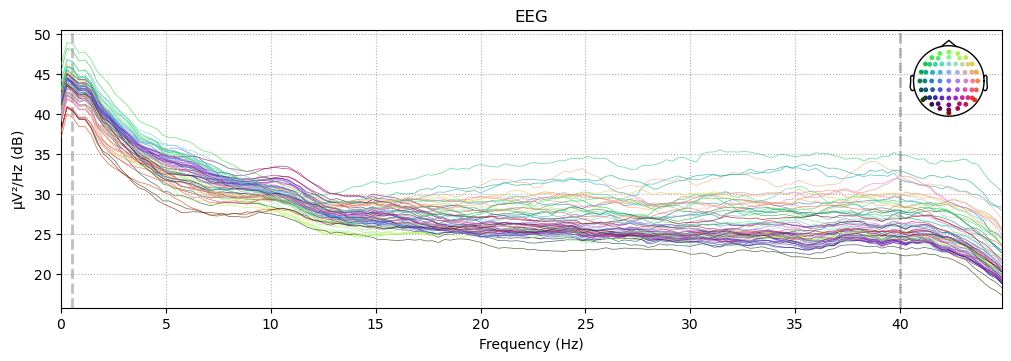

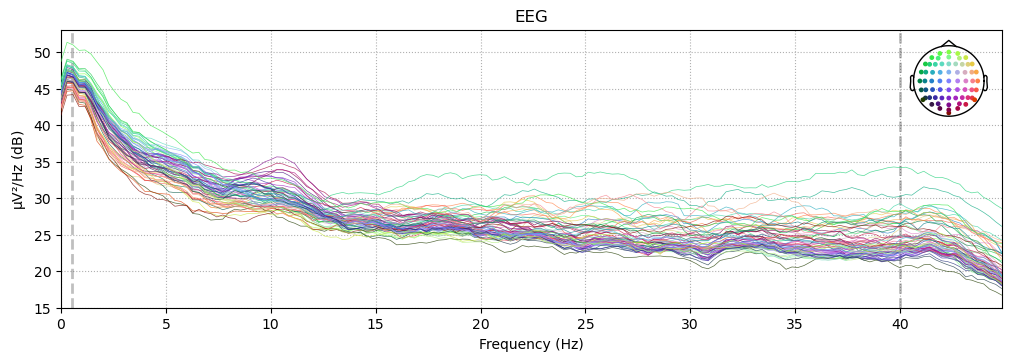

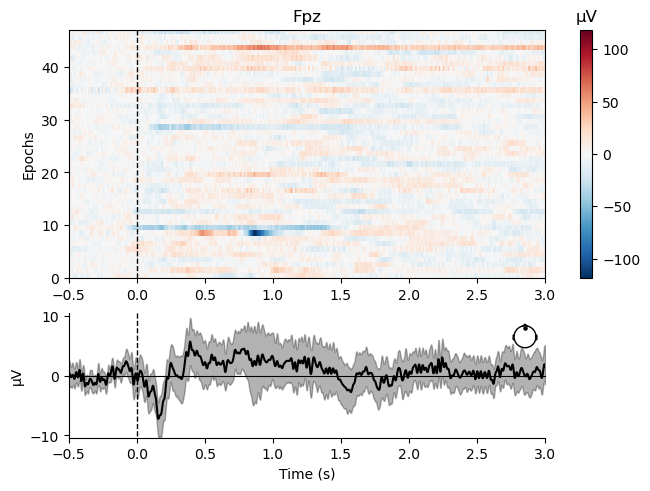

In [ ]:
sort_order = np.argsort(epochs.metadata["goal_hierarchy"])
epochs.plot_image(order=sort_order, picks="Fpz")
epochs.plot(picks="Fpz")

In [37]:
epochs.metadata["goal_hierarchy"].unique()

TypeError: 'NoneType' object is not subscriptable

In [36]:

from pathlib import Path
evokeds = dict()
query = "goal_hierarchy == '{}'"
for hierarchies in epochs.metadata["goal_hierarchy"].unique():
    evokeds[str(hierarchies)] = epochs[query.format(hierarchies)].average()

mne.viz.plot_compare_evokeds(evokeds, cmap=('goal hierarchy', 'Accent'),
                             picks='Fpz')

mne.viz.plot_compare_evokeds(evokeds, cmap=('goal hierarchy', 'Accent'),
                             picks='Fpz')



TypeError: 'NoneType' object is not subscriptable

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
['EXG8']


In [13]:
from mne.time_frequency import tfr_morlet

evoked = epochs.average()

In [14]:
freqs = list(range(3,30))
tfr_epochs = tfr_morlet(epochs, freqs, 1.5, return_itc = False)

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   21.0s


In [16]:
epochs_tower = epochs['goal_hierarchy == "tower"']

# Get the indices of all epochs
all_indices = np.arange(len(epochs_tower))

# Select 12 random indices
random_indices = np.random.choice(all_indices, size=12, replace=False)

# Select the random epochs
random_epochs_tower = epochs_tower[random_indices]



random_epochs_tower


epochs_plane= epochs['goal_hierarchy == "plane"']

In [24]:
freqs = list(range(2,30))
tfr_epochs_tower = tfr_morlet(random_epochs_tower, freqs, 1, return_itc = False)
tfr_epochs_plane = tfr_morlet(epochs_plane, freqs, 1, return_itc = False)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    6.1s


Aplico baseline despues del morlet

In [27]:
tfr_epochs_tower.apply_baseline(baseline=(-0.5, -0.2))
tfr_epochs_plane.apply_baseline(baseline=(-0.5, -0.2))

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


<AverageTFR | time : [-0.500000, 3.000000], freq : [2.000000, 29.000000], nave : 12, channels : 64, ~49.1 MB>

No baseline correction applied


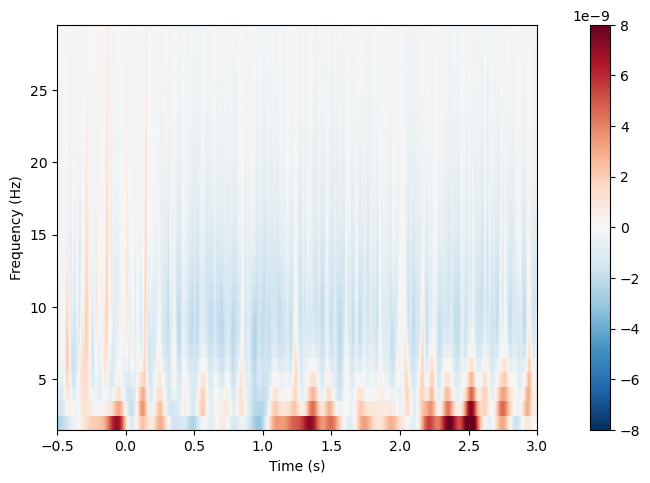

No baseline correction applied


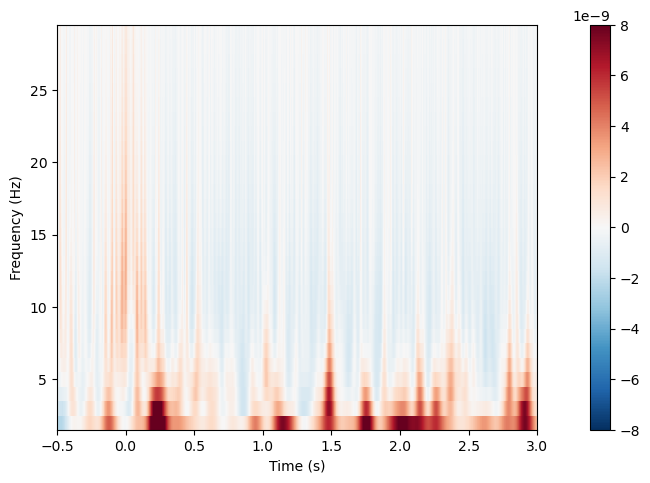

[<Figure size 640x480 with 2 Axes>]

In [33]:
tfr_epochs_tower.plot(picks = "Fpz", vmax=1e-9*8, vmin = 1e-9*-8)
tfr_epochs_plane.plot(picks = "Fpz", vmax=1e-9*8, vmin = 1e-9*-8)

In [34]:
print(tfr_epochs_plane)
X = [np.transpose(x, (0, 2, 3, 1)) for x in epochs_power]

<AverageTFR | time : [-0.500000, 3.000000], freq : [2.000000, 29.000000], nave : 12, channels : 64, ~49.1 MB>


## Explore event-related dynamics for specific frequency bands

In [108]:
epochs = mne.read_epochs("..\data\TOL\epochs\SAAV0009_TOL_epochs_05_3.fif")

# let's explore some frequency bands
""" iter_freqs = [("Theta", 4, 7), ("Alpha", 8, 12), ("Beta", 13, 25), ("Gamma", 30, 45)] """
iter_freqs = [("Delta", 1, 3), ("Theta", 4, 7), ("Alpha", 8, 12), ("Beta", 13, 25), ("Gamma", 30, 45)]

Reading e:\Procesamiento EEG\scripts\..\data\TOL\epochs\SAAV0009_TOL_epochs_05_3.fif ...
    Found the data of interest:
        t =    -500.00 ...    3000.00 ms
        0 CTF compensation matrices available


C:\Users\slipina\AppData\Local\Temp\ipykernel_11024\3327700402.py:1: RuntimeWarning: This filename (..\data\TOL\epochs\SAAV0009_TOL_epochs_05_3.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs("..\data\TOL\epochs\SAAV0009_TOL_epochs_05_3.fif")


Not setting metadata
47 matching events found
No baseline correction applied
0 projection items activated


In [98]:
iter_freqs

[('Theta', 4, 7), ('Alpha', 8, 12), ('Beta', 13, 25), ('Gamma', 30, 45)]

In [103]:
frequency_map = list()

for band, fmin, fmax in iter_freqs:
    epochs = mne.read_epochs("..\data\TOL\epochs\SAAV0009_TOL_epochs_05_3.fif") 
    # get analytic signal (envelope)
epochs.apply_hilbert(envelope=True)
frequency_map.append(((band, fmin, fmax), epochs.average()))

Reading e:\Procesamiento EEG\scripts\..\data\TOL\epochs\SAAV0009_TOL_epochs_05_3.fif ...
    Found the data of interest:
        t =    -500.00 ...    3000.00 ms
        0 CTF compensation matrices available


C:\Users\slipina\AppData\Local\Temp\ipykernel_11024\3598176600.py:4: RuntimeWarning: This filename (..\data\TOL\epochs\SAAV0009_TOL_epochs_05_3.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs("..\data\TOL\epochs\SAAV0009_TOL_epochs_05_3.fif")


Not setting metadata
47 matching events found
No baseline correction applied
0 projection items activated
Reading e:\Procesamiento EEG\scripts\..\data\TOL\epochs\SAAV0009_TOL_epochs_05_3.fif ...
    Found the data of interest:
        t =    -500.00 ...    3000.00 ms
        0 CTF compensation matrices available


C:\Users\slipina\AppData\Local\Temp\ipykernel_11024\3598176600.py:4: RuntimeWarning: This filename (..\data\TOL\epochs\SAAV0009_TOL_epochs_05_3.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs("..\data\TOL\epochs\SAAV0009_TOL_epochs_05_3.fif")


Not setting metadata
47 matching events found
No baseline correction applied
0 projection items activated
Reading e:\Procesamiento EEG\scripts\..\data\TOL\epochs\SAAV0009_TOL_epochs_05_3.fif ...
    Found the data of interest:
        t =    -500.00 ...    3000.00 ms
        0 CTF compensation matrices available


C:\Users\slipina\AppData\Local\Temp\ipykernel_11024\3598176600.py:4: RuntimeWarning: This filename (..\data\TOL\epochs\SAAV0009_TOL_epochs_05_3.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs("..\data\TOL\epochs\SAAV0009_TOL_epochs_05_3.fif")


Not setting metadata
47 matching events found
No baseline correction applied
0 projection items activated
Reading e:\Procesamiento EEG\scripts\..\data\TOL\epochs\SAAV0009_TOL_epochs_05_3.fif ...
    Found the data of interest:
        t =    -500.00 ...    3000.00 ms
        0 CTF compensation matrices available


C:\Users\slipina\AppData\Local\Temp\ipykernel_11024\3598176600.py:4: RuntimeWarning: This filename (..\data\TOL\epochs\SAAV0009_TOL_epochs_05_3.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs("..\data\TOL\epochs\SAAV0009_TOL_epochs_05_3.fif")


Not setting metadata
47 matching events found
No baseline correction applied
0 projection items activated


In [174]:
frequency_map = list()

for band, fmin, fmax in iter_freqs:
    epochs_iter = epochs.copy().pick_channels(['Fpz'])
    epochs_iter.filter(fmin, fmax,
        l_trans_bandwidth=1,  # make sure filter params are the same
        h_trans_bandwidth=1)
    # get analytic signal (envelope)
    epochs_iter.apply_hilbert(envelope=True)
    frequency_map.append(((band, fmin, fmax), epochs_iter.average()))

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 1 - 3 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 3.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Filter length: 3381 samples (3.302 s)



NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 3381 samples (3.302 s)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
-

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 13 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 25.50 Hz)
- Filter length: 3381 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 30 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 30.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 29.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 45.50 Hz)
- Filter length: 3381 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


In [175]:
print(frequency_map)

[(('Delta', 1, 3), <Evoked | '1' (average, N=47), -0.5 – 3 s, baseline -0.5 – 0 s, 1 ch, ~59 kB>), (('Theta', 4, 7), <Evoked | '1' (average, N=47), -0.5 – 3 s, baseline -0.5 – 0 s, 1 ch, ~59 kB>), (('Alpha', 8, 12), <Evoked | '1' (average, N=47), -0.5 – 3 s, baseline -0.5 – 0 s, 1 ch, ~59 kB>), (('Beta', 13, 25), <Evoked | '1' (average, N=47), -0.5 – 3 s, baseline -0.5 – 0 s, 1 ch, ~59 kB>), (('Gamma', 30, 45), <Evoked | '1' (average, N=47), -0.5 – 3 s, baseline -0.5 – 0 s, 1 ch, ~59 kB>)]


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


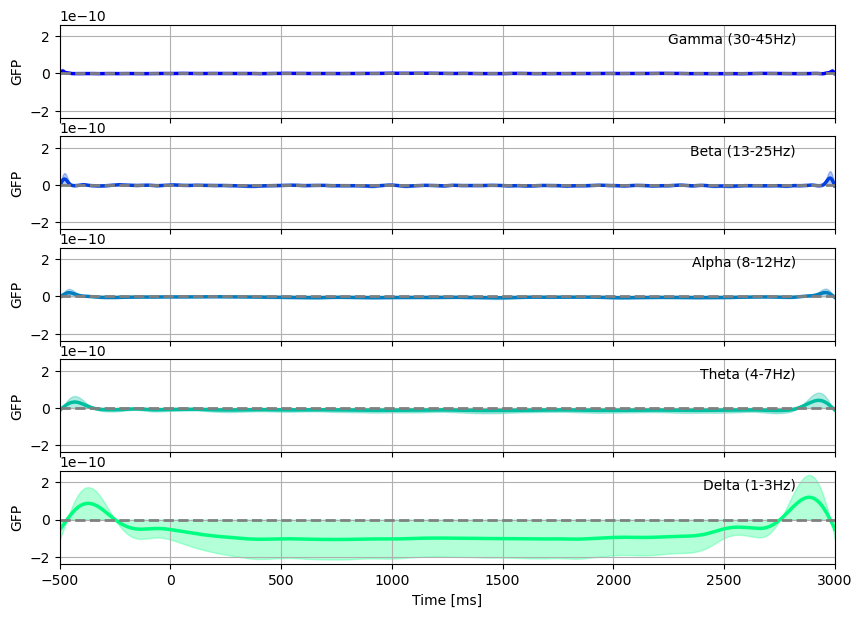

In [176]:
import matplotlib.pyplot as plt
from mne.stats import bootstrap_confidence_interval
from mne.baseline import rescale

# Helper function for plotting spread
def stat_fun(x):
    """Return sum of squares."""
    return np.sum(x**2, axis=0)


# Plot
fig, axes = plt.subplots(5, 1, figsize=(10, 7), sharex=True, sharey=True)
colors = plt.colormaps["winter_r"](np.linspace(0, 1, 5))
for ((freq_name, fmin, fmax), average), color, ax in zip(
    frequency_map, colors, axes.ravel()[::-1]
):
    times = average.times * 1e3 
    gfp = np.sum(average.data**2, axis=0)
    gfp = mne.baseline.rescale(gfp, times, baseline=(-500, 0))
    ax.plot(times, gfp, label=freq_name, color=color, linewidth=2.5)
    ax.axhline(0, linestyle="--", color="grey", linewidth=2)
    ci_low, ci_up = bootstrap_confidence_interval(
        average.data, random_state=0, stat_fun=stat_fun
    )
    ci_low = rescale(ci_low, average.times, baseline=(None, 0))
    ci_up = rescale(ci_up, average.times, baseline=(None, 0))
    ax.fill_between(times, gfp + ci_up, gfp - ci_low, color=color, alpha=0.3)
    ax.grid(True)
    ax.set_ylabel("GFP")
    ax.annotate(
        "%s (%d-%dHz)" % (freq_name, fmin, fmax),
        xy=(0.95, 0.8),
        horizontalalignment="right",
        xycoords="axes fraction",
    )
    ax.set_xlim(-500, 3000)
    #ax.set_ylim(1e-8*-0.1, 1e-8*0.5)

axes.ravel()[-1].set_xlabel("Time [ms]")

fig

In [216]:
epochs_Fpz = epochs.copy().pick_channels(['Fpz'])
epochs_theta = epochs_Fpz.filter(4, 7)
epochs_theta.apply_hilbert(envelope=True)




NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 8.00 Hz)
- Filter length: 1691 samples (1.651 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Number of events,47
Events,1: 47
Time range,-0.500 – 3.000 s
Baseline,-0.500 – 0.000 s


In [217]:
df = epochs_theta.to_data_frame()

goal_hierarchy = ["tower", "tower", "tower", "tower", "tower",
"plane", "tower", "tower", "tower", "tower",
"tower", "tower", "tower", "tower", "tower",
"plane", "tower", "tower", "plane", "tower",
"tower", "plane", "tower", "tower", "tower",
"tower", "tower", "plane", "plane", "plane",
"tower", "plane", "plane", "tower", "plane",
"tower", "tower", "tower", "tower", "tower",
"tower", "plane", "tower", "tower", "tower",
"plane", "tower", "tower"]


df = pd.DataFrame (
    goal_hierarchy[1:],   
    columns= ["goal_hierarchy"])

epochs_theta.metadata = df
epochs_theta.metadata.head()

Replacing existing metadata with 1 columns


,goal_hierarchy
0,tower
1,tower
2,tower
3,tower
4,plane


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


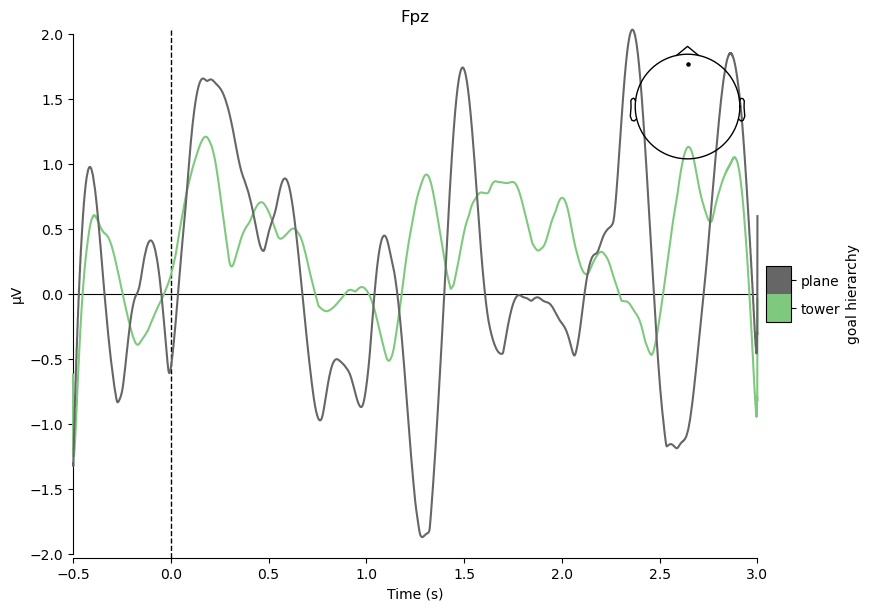

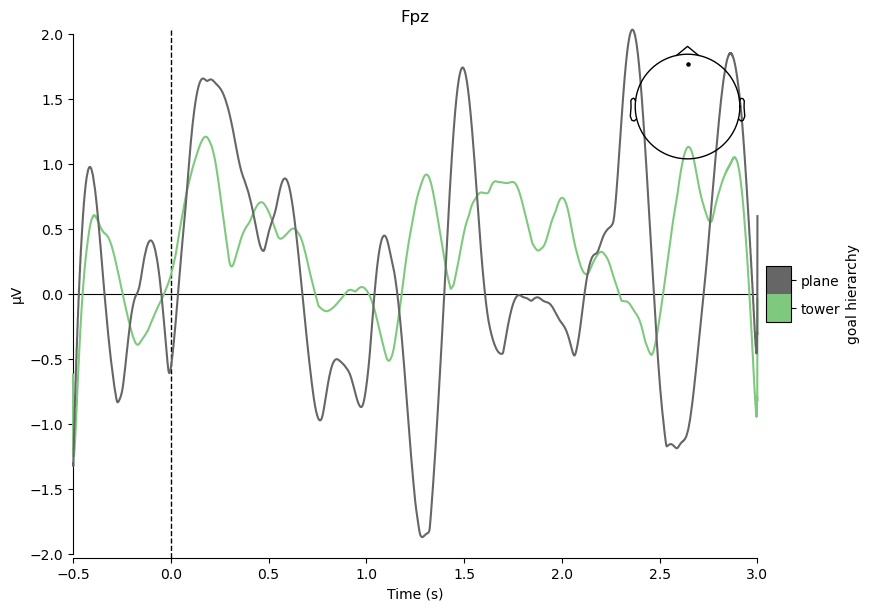

[<Figure size 800x600 with 3 Axes>]

In [222]:

from pathlib import Path
evokeds = dict()
query = "goal_hierarchy == '{}'"
for hierarchies in epochs_theta.metadata["goal_hierarchy"].unique():
    evokeds[str(hierarchies)] = epochs_theta[query.format(hierarchies)].apply_baseline(baseline=(-0.5, 0)).average()

mne.viz.plot_compare_evokeds(evokeds, cmap=('goal hierarchy', 'Accent'),
                             picks='Fpz')

mne.viz.plot_compare_evokeds(evokeds, cmap=('goal hierarchy', 'Accent'),
                             picks='Fpz')

